#### Signifance Testing Simplified

Hypothesis testing and statistical significance are tools used to determine if a change or a proposition put forward has made a non-trivial, significant impact or not.

Taking the problem of trying to test whether a change has occured or not at face value doesn't seem all that complicated right? I mean you take a one meassurement before the change and one after and then see if theres a difference. Done! Easy right!?.

Unfortunately things arent that simple. We need to account for random variation. We have to be sure that whatever changes made to a system make enough of a significant impact to stand out above all the noise of random variation. Let me use an analogy, imagine Alice standing at one end of a resturant at peak hour and Bob standing at the other end. In order for Alice to say something to Bob and be sure he heard it, Alice would have to speak louder than the ambient noise in the resturant. Anything Alice says at or below the ambient noise level simply drowns in the ambience.

So, where in the real world is this applicable? Research desgin for one. For exmaple, signifance testing can be used to determine if a drug, workout regime, bedtime habbit or whatever else is being tested has any meaningful impact after being applied. If there is a meaningful impact, we say that the results are statistically significant. 

Lets use an example to take this explaination further. Lets assume we do an experiment to see if Brad Castleberry's new BIG BOI DYNAMO 3k WHEY or BBD3kW (purchased for 5 monthly installments of $69.99, comes with 2 free fake plates) is an effective supplement for building muscle or not. 

A pretty standard way of testing something like this is to first set up a null hypothesis that describes the status quo (the current state of the system) and an alternative hypothesis to oppose it. In this particular scenario our null and alternative hypotheses are:

      null hypothesis: people who worked out and used BBD3kW gained no more muscle that those who worked out and didnt use it
      alternative hypothesis: people who worked out and used BBD3kW gained more muscle than those who worked out and didnt use it
      
We would then split participants of the experiment into two groups, one to use the supplement and one to not use the supplement.

weight_gain.csv contains 2 lists, list A are the weights that the first group(not using any supplements) gained after 12 weeks and list B are the weights that the second group(using BBD3kW) gained after 12 weeks. For now, we just plot the histograms.

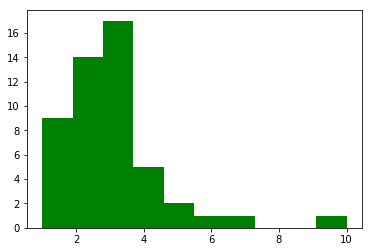

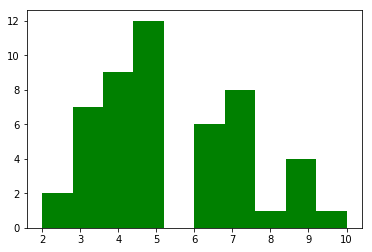

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weights = pd.read_csv('weight_gain.csv')
weight_gained_a = weights['A']
weight_gained_b = weights['B']

mean_group_a = np.mean(weight_gained_a)
mean_group_b = np.mean(weight_gained_b)

plt.hist(weight_gained_a,color = "green")
plt.show()
plt.hist(weight_gained_b, color ="green")
plt.show()

We need a test statistic to use as a metric to decide which hypothesis to accept. We use this test statistic to run a statistical test that will determine how likely the difference between the groups were due to random chance.

Since we want to know if the amount of weight gained between the groups is meaningfully different, we will use the difference in the means, also known as the mean difference, of the amount of weight gained for each group as the test statistic. 

x̅ (x bar) is used to represent the sample mean in statistics. This is what we'll use:

$x̅_{a}$ will denote the mean of Group A and 

$x̅_{b}$ will denote the mean of Group B.

Now that we've done this, we need to frame the hypotheses more quantitatively. What we're trying to do really, is figure out if the sample mean from groups A and B differ significantly or not. If the sample mean from group A (no supplemnt use) is about the same as the sample mean from group B (sample use) then we can reframe our null hypothesis as:


$x̅_{b}$  - $x̅_{a}$ = 0

   and if the sample mean from group A is larger than group B we can reframe our Alternative hypothesis as:

$x̅_{b}$  - $x̅_{a}$ > 0 

#### Please note that we aren't actually solving these equations to determine our hypothesis, we will be doing a statistical test on the result of solving the above equations:

In [17]:
mean_difference = mean_group_b - mean_group_a
mean_difference

2.52

#### 2.52 is our mean difference.

We will now conduct a test to find out whether this difference is significant or just part of random variation.

The permutation test is a statistical test that involves simulating rerunning the study many times and recalculating the test statistic for each iteration. Once we have a whole host of different test statistics we can then construct a sampling distrbution of these test statistics. From this, we can see how likely (or unlikely) our mean difference of 2.52 is. If 2.52 happens to lie somewhere around the mean of this sampling distribution then we know that its common and we can accept the null hypothesis. If it's instead extremely rare, then we accept the alternative hypothesis instead.

Essentially, we re-run the study many times by simulating it.

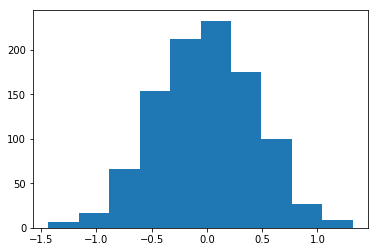

In [22]:
mean_difference = 2.52
mean_differences = []
#consolidate all weights gained from a and b into a single list
all_values = weight_gained_a.append(weight_gained_b)
#repeat the experiment 1000 times
for i in range(1000):
    group_a = []
    group_b = []
    for value in all_values:
        #generate random number between 0 and 1
        assignment_chance = np.random.rand()
        if assignment_chance >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    #after each iteration append the mean difference to the list
    mean_differences.append(iteration_mean_difference)
    
plt.hist(mean_differences)
plt.show()

The histogram generated above is a visual representation of the sampling distribution.

By randomly assigning participants to group A or group B, we account for the effect of random chance. The 1000 iterations help us see all possible configurations of the results across both groups. 

A useful thing to do now is create a dictionary that contains the values in the sampling distribution so we can benchmark our observed test statistic against it.

The keys in the dictionary should be the test statistic and the values should be their frequency:

In [24]:
sampling_distribution = {}
for df in mean_differences:
    #check if the current iteration's value is already in sampling_distribution.
    if sampling_distribution.get(df, False):
        #increment the existing value if it does
        sampling_distribution[df] = sampling_distribution[df] + 1
    else:
        #add it to sampling_distribution as a key and assign 1 as the value.
        sampling_distribution[df] = 1

In the sampling distribution we generated, most of the values are closely centered around the mean difference of 0. This means that if it were purely up to chance, both groups would have gained the same amount of weight (the null hypothesis). But since the observed test statistic is not near 0, it could mean that the supplement could be responsible for the mean difference in the study.

We say could because we arent completely sure yet. We use one last tool to determine this for sure, namely the p value. The p value is the probability that our mean difference is random. Usually, a threshold is set before the experiment is conducted and the most common threshold to set the p-value to is 0.05 or 5%, it means that there's only a 5% chance that the results are due to random chance.

We can now use the sampling distribution to determine the number of times a value of 2.52 or higher appeared in our simulations. If we then divide that frequency by 1000(since we did a thousand iterations), we'll have the probability of observing a mean difference of 2.52 or higher purely due to random chance.

In [26]:
frequencies = []
for sp in sampling_distribution.keys():
    if sp >= 2.52:
        frequencies.append(sampling_distribution[sp])
p_value = np.sum(frequencies) / 1000
p_value

0.0

Since the p value of 0 is less than the threshold we set of 0.05, we conclude that the difference in weight lost can't be attributed to random chance alone. **We therefore reject the null hypothesis and accept the alternative hypothesis**

It is important to not the the p value threshold you set can also affect the conclusion you reach.

   If you set too high of a p value threshold, you may accept the alternative hypothesis incorrectly and reject the null hypothesis. **This is known as a type I error.**
   
   If you set too low of a p value threshold, you may reject the alternative hypothesis incorrectly in favor of accepting the null hypothesis. **This is known as a type II error.**


Amazingly, it seems Brad Dinkleberrys supplement actually works!